In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_2017 = pd.read_csv('../data/2017/accident.csv')

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df_2017[(df_2017['STATE'] == 6)].shape

(3304, 52)

In [58]:
df_2016 = pd.read_csv('../data/2016/accident.csv')
df_2015 = pd.read_csv('../data/2015/accident.csv')

In [59]:
df_2017.shape, df_2016.shape, df_2015.shape

((34247, 52), (34748, 52), (32538, 52))

In [60]:
df_2017.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [61]:
columns = ['STATE', 'COUNTY', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'LATITUDE', 'LONGITUD', 'HOUR', 'WEATHER', 'ROUTE', 'TWAY_ID', 'TYP_INT']
df_2017 = df_2017[columns]

In [62]:
df_2016 = df_2016[columns]
df_2015 = df_2015[columns]

In [63]:
df_2017.shape, df_2016.shape, df_2015.shape

((34247, 13), (34748, 13), (32538, 13))

In [64]:
df_all = pd.concat([df_2017, df_2016, df_2015], axis=0)

In [65]:
df_all.shape

(101533, 13)

In [66]:
df_all.select_dtypes(include=np.number).columns

Index(['STATE', 'COUNTY', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'LATITUDE',
       'LONGITUD', 'HOUR', 'WEATHER', 'ROUTE', 'TYP_INT'],
      dtype='object')

In [67]:
df_all.isnull().sum()

STATE       0
COUNTY      0
DAY         0
MONTH       0
YEAR        0
DAY_WEEK    0
LATITUDE    0
LONGITUD    0
HOUR        0
WEATHER     0
ROUTE       0
TWAY_ID     0
TYP_INT     0
dtype: int64

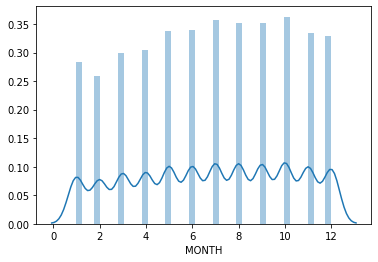

In [68]:
sns.distplot(df_all['MONTH']);

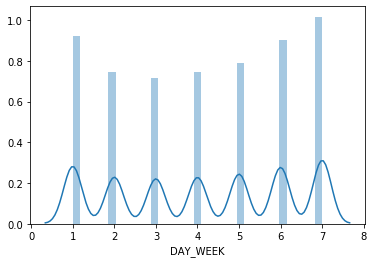

In [69]:
sns.distplot(df_all['DAY_WEEK']);

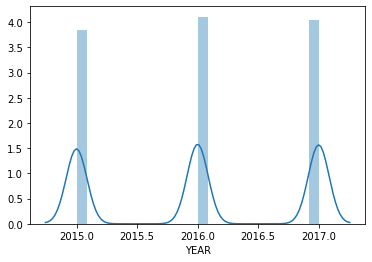

In [70]:
sns.distplot(df_all['YEAR']);

In [71]:
filter = df_all[df_all['HOUR']<24]

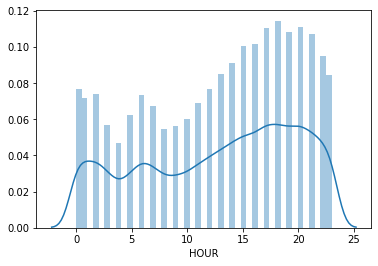

In [72]:
sns.distplot(filter['HOUR']);

In [21]:
import pandas_profiling
df_all.profile_report()

In [73]:
df_all = df_all[df_all['HOUR']<25]

In [74]:
df_all = df_all[df_all['LATITUDE']<70]

In [75]:
df_all = df_all[df_all['LONGITUD']<700]

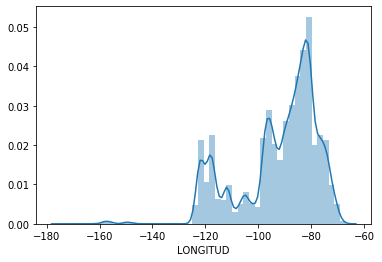

In [76]:
sns.distplot(df_all['LONGITUD']);

In [77]:
df_all.head(5)

STATE  COUNTY  DAY  MONTH  YEAR  DAY_WEEK   LATITUDE   LONGITUD  HOUR  \
0      1      73   19      2  2017         1  33.335661 -87.007094    23   
1      1      89   14      2  2017         3  34.661528 -86.786853    14   
2      1     101   31      1  2017         3  32.366519 -86.145281    20   
3      1      73    1      1  2017         1  33.510175 -86.894003    16   
4      1      13    1      1  2017         1  31.947236 -86.556778    20   

   WEATHER  ROUTE         TWAY_ID  TYP_INT  
0        1      1           I-459        1  
1        1      1           I-565        1  
2        1      1            I-85        1  
3        2      6  20TH ST ENSLEY        2  
4        2      1            I-65        1

In [78]:
df_all.shape

(100299, 13)

## Generate Dummy Data for Instances with No Accidents

In [27]:
import random
from datetime import datetime, timedelta

def gen_datetime(min_year=1900, max_year=datetime.now().year):
    start = datetime(min_year, 1, 1, 00, 00, 00)
    years = max_year - min_year + 1
    end = start + timedelta(days=365 * years)
    return start + (end - start) * random.random()

In [50]:
def random_data():
    df_none = pd.DataFrame(columns=df_all.columns)
    for _ in range(100300):
        random_row = df_all.iloc[random.randint(0, 100298)].copy()
        random_row['DAY'] = gen_datetime(min_year=2015, max_year=2017).day
        random_row['MONTH'] = gen_datetime(min_year=2015, max_year=2017).month
        random_row['YEAR'] = gen_datetime(min_year=2015, max_year=2017).year
        random_row['DAY_WEEK'] = gen_datetime(min_year=2015, max_year=2017).weekday()
        random_row['HOUR'] = gen_datetime(min_year=2015, max_year=2017).hour
        random_row['LATITUDE'] = random_row['LATITUDE'] + random.uniform(-0.00001, 0.00001)
        random_row['LONGITUD'] = random_row['LONGITUD'] + random.uniform(-0.00001, 0.00001)
        df_none = df_none.append(random_row)
    return df_none

In [51]:
df_none = random_data()

In [53]:
df_none.shape

(100299, 13)

In [62]:
duplicates = df_none.iloc[:,2:8].values == df_all.iloc[:,2:8].values

In [74]:
true = [item.all() for item in duplicates]

In [77]:
sum(true)

0

In [79]:
df_all['ACCIDENT'] = 1

In [81]:
df_none['ACCIDENT'] = 0

In [86]:
df_none.to_csv('../data/no_accidents.csv')

In [89]:
df_none.profile_report()

In [93]:
df_none.shape

(100299, 14)

In [94]:
df_all.shape

(100299, 14)

In [95]:
df_final = df_all.append(df_none, sort=False, ignore_index=True)

In [96]:
df_final.shape

(200598, 14)

## Baseline predictive models

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import category_encoders as ce

In [103]:
df_final.head()

STATE COUNTY DAY MONTH  YEAR DAY_WEEK   LATITUDE   LONGITUD HOUR WEATHER  \
0     1     73  19     2  2017        1  33.335661 -87.007094   23       1   
1     1     89  14     2  2017        3  34.661528 -86.786853   14       1   
2     1    101  31     1  2017        3  32.366519 -86.145281   20       1   
3     1     73   1     1  2017        1  33.510175 -86.894003   16       2   
4     1     13   1     1  2017        1  31.947236 -86.556778   20       2   

  ROUTE         TWAY_ID TYP_INT  ACCIDENT  
0     1           I-459       1         1  
1     1           I-565       1         1  
2     1            I-85       1         1  
3     6  20TH ST ENSLEY       2         1  
4     1            I-65       1         1

In [107]:
trainval = df_final[df_final['YEAR'] != 2017]
test = df_final[df_final['YEAR'] == 2017]
trainval.shape, test.shape

((133528, 14), (67070, 14))

In [109]:
trainval['ACCIDENT'].value_counts(normalize=True)

0    0.501715
1    0.498285
Name: ACCIDENT, dtype: float64

In [135]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        RandomForestRegressor
                        (n_estimators=1000,
                        max_depth=6,
                        random_state=42, 
                        n_jobs=-1)))

model.fit(X_trainval, y_trainval)
print('Validation accuracy', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test accuracy', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation accuracy 0.22430333799553281
Test accuracy -0.0587730368012751


In [159]:
pred_trainval = model.predict(X_trainval)
mse = mean_squared_error(y_trainval, pred_trainval)
print("trainval data MSE score: %.3f" % mse)

trainval data MSE score: 0.194


In [160]:
pred_trainval

array([0.52507226, 0.52914736, 0.52853297, ..., 0.52850412, 0.5558584 ,
       0.53482104])

In [161]:
pred_class = [1 if p>=0.50 else 0 for p in pred_trainval]
(y_trainval==pred_class).sum() / len(y_trainval)

0.6449883170570967

## Not a time-series model

In [162]:
from sklearn.model_selection import train_test_split
trainval, test = train_test_split(df_final, stratify=y, test_size=0.2)

In [167]:
trainval.shape, test.shape

((160478, 14), (40120, 14))

In [169]:
trainval['ACCIDENT'].value_counts()

1    80239
0    80239
Name: ACCIDENT, dtype: int64

In [170]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        RandomForestRegressor
                        (n_estimators=1000,
                        max_depth=6,
                        random_state=42, 
                        n_jobs=-1)))

model.fit(X_trainval, y_trainval)
print('Validation R^2', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test R^2', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation accuracy 0.17502126403422047
Test accuracy 0.1510633379825319


In [171]:
pred_trainval = model.predict(X_trainval)
mse = mean_squared_error(y_trainval, pred_trainval)
print("trainval data MSE score: %.3f" % mse)

trainval data MSE score: 0.206


In [172]:
pred_class = [1 if p>=0.50 else 0 for p in pred_trainval]
(y_trainval==pred_class).sum() / len(y_trainval)

0.6122895350141453

In [178]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(n_estimators=1000, n_jobs=-1)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.6846483630154913
Test Score 0.6352442671984048


In [179]:
trainval = df_final[df_final['YEAR'] != 2017]
test = df_final[df_final['YEAR'] == 2017]
trainval.shape, test.shape

((133528, 14), (67070, 14))

In [180]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(n_estimators=1000, n_jobs=-1)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.7410280989754958
Test Score 0.5769643655881914


In [185]:
import pickle
def row_augument(row):
    new_row = pickle.loads(pickle.dumps(row))
    for _ in range(1000):
        new_datetime = gen_datetime(2015, 2017)
        condition = (
            (df_all['DAY']==new_datetime.day) &
            (df_all['MONTH']==new_datetime.month) &
            (df_all['YEAR']==new_datetime.year) &
            (df_all['HOUR']==new_datetime.hour)
        )
        if df_all[condition].empty:
            continue
        else:
            break
    new_row['DAY'] = new_datetime.day
    new_row['MONTH'] = new_datetime.month
    new_row['YEAR'] = new_datetime.year
    new_row['DAY_WEEK'] = new_datetime.weekday()
    new_row['HOUR'] = new_datetime.hour
    distance = random.uniform(-0.000009, 0.000009)
    new_row['LATITUDE'] = row['LATITUDE'] + distance
    distance = random.uniform(-0.000009, 0.000009)
    new_row['LONGITUD'] = row['LONGITUD'] + distance
    new_row['ACCIDENT'] = 0
    return new_row.values
    
df_noacc = []    
for _ in range(5):
    for rid, row in df_all.iterrows():
        new_row = row_augument(row)
        df_noacc.append(new_row)
df_noacc = pd.DataFrame(df_noacc, columns=df_all.columns)
print(df_noacc.shape)

(100299, 14)


In [186]:
df_noacc

STATE  COUNTY  DAY  MONTH  YEAR  DAY_WEEK   LATITUDE    LONGITUD  \
0           1      73    7      3  2017         1  33.335660  -87.007099   
1           1      89    6      1  2017         4  34.661528  -86.786853   
2           1     101    7      1  2015         2  32.366524  -86.145284   
3           1      73   29      1  2015         3  33.510181  -86.893995   
4           1      13    6     10  2016         3  31.947244  -86.556772   
5           1      49   30     12  2016         4  34.367080  -85.804176   
6           1      73   17     12  2017         6  33.545514  -86.761388   
7           1       3   26      9  2016         0  31.033673  -87.635110   
8           1      87   17     11  2016         3  32.417593  -85.942913   
9           1      73   21      1  2017         5  33.668449  -86.553430   
10          1      87   29      9  2016         3  32.393067  -85.983923   
11          1      85   22      7  2017         5  32.131464  -86.445099   
12          1      83   10      4  2017         0  34.962792  -86.795217   
13          1      43    5      4  2017         2  34.094054  -86.800044   
14          1     121   28     12  2016         2  33.185187  -86.284909   
15          1     121   28      2  2016         6  33.431556  -86.184974   
16          1     101    8      6  2015         0  32.187117  -86.040816   
17          1     121    6     12  2017         2  33.266311  -86.352207   
18          1      55    8      5  2015         4  34.028687  -86.031606   
19          1      89   21     12  2015         0  34.845461  -86.642662   
20          1     111    1      8  2017         1  33.158924  -85.435078   
21          1     103   15      1  2015         3  34.526466  -86.787788   
22          1      79   15      6  2017         3  34.493862  -87.258720   
23          1     109   30      5  2015         5  31.766804  -85.906714   
24          1     123    6     12  2016         1  32.903364  -85.763702   
25          1       3   24      7  2016         6  30.472416  -87.818560   
26          1      83    2      7  2015         3  34.818816  -86.950768   
27          1      15    3      2  2015         1  33.807321  -85.834546   
28          1      43   23      2  2015         0  34.133194  -86.648607   
29          1      47   23     10  2017         0  32.417383  -87.083199   
...       ...     ...  ...    ...   ...       ...        ...         ...   
100269     56      37   29      9  2016         3  41.505402 -109.993192   
100270     56      25   31     12  2016         5  42.853696 -106.101107   
100271     56      45   30     12  2017         5  44.075000 -104.588706   
100272     56      25   16      9  2017         5  42.831022 -106.337095   
100273     56      25    5      4  2016         1  43.086429 -106.337207   
100274     56      21    3      7  2016         6  41.155702 -105.056594   
100275     56       9   25      9  2015         4  42.635293 -105.143396   
100276     56       7    4      2  2016         3  41.109106 -107.226007   
100277     56       1   15      5  2015         4  41.694807 -105.508391   
100278     56      25   20     11  2015         4  43.443798 -106.238500   
100279     56      37   28      6  2016         1  41.607800 -109.655706   
100280     56       3    4     12  2016         6  44.486702 -108.458405   
100281     56       9   16      5  2017         1  42.959230 -105.612581   
100282     56       5   10     11  2016         3  43.645608 -105.665976   
100283     56      13    6      5  2015         2  42.927992 -108.780007   
100284     56       9   12      2  2015         3  42.747109 -105.386899   
100285     56      25    7     12  2017         3  43.124661 -107.371048   
100286     56      31   24      4  2015         4  41.794024 -104.791975   
100287     56      13   14      7  2016         3  43.082805 -108.378706   
100288     56      41   15      8  2017         1  41.307797 -110.199781   
100289     56      25   15      5  2015         4  42.85

In [187]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(n_estimators=1000, n_jobs=-1)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

In [200]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    preprocess, 
    XGBClassifier(random_state=42)
)

param_distributions = {
    'xgbclassifier__n_estimators': [500, 1000, 2000], 
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__learning_rate': [0.0001, 0.001, 0.01, 0.2, 0.3],
    'xgbclassifier__subsample': [0.3, 0.5, 0.7, 0.9],
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 0.8, 0.9],
    'xgbclassifier__min_child_weight': [1, 3, 4]
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_squared_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_trainval, y_trainval);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed: 14.1min remaining: 14.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 28.1min remaining: 12.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 31.7min finished


In [202]:
print('Best hyperparameters', search.best_params_)
print('Best score', search.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 0.5, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__colsample_bytree': 0.7}
Best score -0.5634848121742256


In [205]:
search.scoring

'neg_mean_squared_error'

In [206]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(subsample=0.5, n_estimators=1000, 
                                      min_child_weight=1, max_depth=5, 
                                      learning_rate=0.3, colsample_bytree=0.7)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8950557186507698
Test Score 0.5480691814522141


In [210]:
pred_trainval = model.predict(X_trainval)
mse = mean_squared_error(y_trainval, pred_trainval)
print("Train MSE score:", mse)

Train MSE score: 0.10494428134923012


In [211]:
pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, pred_test)
print("Test MSE", mse)

Test MSE 0.4519308185477859


In [79]:
df_none = pd.read_csv('../data/no_accidents_large.csv')

In [80]:
df_none = df_none.drop(columns=['Unnamed: 0'])

In [81]:
df_none['ACCIDENT'] = 0

In [82]:
df_all['ACCIDENT'] = 1

In [83]:
df_final = df_all.append(df_none, sort=False, ignore_index=True)

In [84]:
df_final.shape

(501495, 14)

In [85]:
from sklearn.model_selection import train_test_split
trainval, test = train_test_split(df_final, test_size=0.2)

In [86]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(subsample=0.5, n_estimators=1000, 
                                      min_child_weight=1, max_depth=5, 
                                      learning_rate=0.3, colsample_bytree=0.7)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.855272734523774
Test Score 0.8422616377032672


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     80563
           1       0.85      0.24      0.38     19736

    accuracy                           0.84    100299
   macro avg       0.84      0.62      0.64    100299
weighted avg       0.84      0.84      0.80    100299



In [103]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    preprocess, 
    RandomForestClassifier()
)

param_distributions = {
    'randomforestclassifier__max_depth': [5,6,7,8,9],
    'randomforestclassifier__max_features': [2, 3],
    'randomforestclassifier__min_samples_leaf': [3, 4, 5],
    'randomforestclassifier__min_samples_split': [8, 10, 12],
    'randomforestclassifier__n_estimators': [100, 200, 300, 1000]
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    cv=5, 
    scoring='roc_auc', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_trainval, y_trainval);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 42.8min finished


In [104]:
print('Best hyperparameters', search.best_params_)
print('Best score', search.best_score_)

Best hyperparameters {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 9}
Best score 0.7241915487590094


In [107]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        RandomForestClassifier(n_estimators=200, min_samples_split=10,
                                      min_samples_leaf=5, max_features=3, max_depth=9)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8340113061944785
Test Score 0.837984426564572


In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     80563
           1       1.00      0.18      0.30     19736

    accuracy                           0.84    100299
   macro avg       0.92      0.59      0.60    100299
weighted avg       0.87      0.84      0.79    100299



In [45]:
trainval = df_final[df_final['YEAR'] != 2017]
test = df_final[df_final['YEAR'] == 2017]
trainval.shape, test.shape

((334615, 14), (166880, 14))

In [46]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(subsample=0.5, n_estimators=1000, 
                                      min_child_weight=1, max_depth=5, 
                                      learning_rate=0.3, colsample_bytree=0.7)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8933580383425728
Test Score 0.7680189357622244


In [27]:
df_none = pd.read_csv('../data/no_accidents_large3.csv')

In [28]:
df_none = df_none.drop(columns=['Unnamed: 0'])

In [29]:
df_none['ACCIDENT'] = 0

In [30]:
df_all['ACCIDENT'] = 1

In [31]:
df_final = df_all.append(df_none, sort=False, ignore_index=True)

In [128]:
df_final.shape

(501495, 14)

In [33]:
from sklearn.model_selection import train_test_split
trainval, test = train_test_split(df_final, test_size=0.2)

In [40]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                                              ce.OrdinalEncoder())))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(subsample=0.5, n_estimators=1000, 
                                      min_child_weight=1, max_depth=5, 
                                      learning_rate=0.3, colsample_bytree=0.7)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8544950597712838
Test Score 0.8368278846249714


In [47]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                                              ce.OrdinalEncoder())))

model = make_pipeline(make_pipeline(
                        preprocess,
                        RandomForestClassifier(n_estimators=1000, 
                                              max_depth=8)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8346718312246383
Test Score 0.8353423264439327


In [111]:
df_none = pd.read_csv('../data/no_accidents_large.csv')

In [112]:
df_none = df_none.drop(columns=['Unnamed: 0'])

In [113]:
df_none['ACCIDENT'] = 0

In [114]:
df_all['ACCIDENT'] = 1

In [115]:
df_final = df_all.append(df_none, sort=False, ignore_index=True)

In [116]:
df_final.shape

(501495, 14)

In [117]:
trainval, test = train_test_split(df_final, test_size=0.2)

In [118]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

target = 'ACCIDENT'
train_features = trainval.drop(columns=[target, 'STATE', 'COUNTY'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
categorical_features = train_features.select_dtypes(exclude='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
high_cardinality_features = cardinality[cardinality > 100].index.tolist()
low_cardinality_features = cardinality[cardinality <= 100].index.tolist()
features = numeric_features + categorical_features

X_trainval = trainval[features]
y_trainval = trainval[target]
X_test = test[features]
y_test = test[target]

preprocess = make_column_transformer(
    (numeric_features, make_pipeline(SimpleImputer(), StandardScaler())),
    (low_cardinality_features, ce.OneHotEncoder(use_cat_names=True)),
    (high_cardinality_features, ce.OrdinalEncoder()))

model = make_pipeline(make_pipeline(
                        preprocess,
                        XGBClassifier(subsample=0.5, n_estimators=1000, 
                                      min_child_weight=1, max_depth=5, 
                                      learning_rate=0.3, colsample_bytree=0.7,
                                      eval_metric='auc',
                                      objective='binary:logistic',
                                      eta=0.5)))

model.fit(X_trainval, y_trainval)
print('Validation Score', model.score(X_trainval, y_trainval))
y_pred = model.predict(X_test)
print('Test Score', model.score(X_test, y_test))

C:\Users\nchib\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


Validation Score 0.8578973868134279
Test Score 0.8430393124557573


In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     80270
           1       0.86      0.26      0.39     20029

    accuracy                           0.84    100299
   macro avg       0.85      0.62      0.65    100299
weighted avg       0.85      0.84      0.81    100299



In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.7739251182832358

In [129]:
y_pred_proba

array([0.22108997, 0.4044599 , 0.55289745, ..., 0.30047268, 0.20653869,
       0.22148332], dtype=float32)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [122]:
from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels

def set_threshold(y_true, y_pred_proba, threshold=0.1):
    """
    For binary classification problems. 
    y_pred_proba : predicted probability of class 1
    """
    
    # Apply threshold to predicted probabilities
    # to get discrete predictions
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Plot distribution of predicted probabilities
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Distribution of predicted probabilities')
    plt.show()

    # Calculate true positive rate and false positive rate
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    actual_negatives = (y_true==class_0)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    print('True Positive Rate', true_positive_rate)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Plot point on ROC curve for the current threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # Show ROC AUC score
    print('Area under the Receiver Operating Characteristic curve:', 
          roc_auc_score(y_true, y_pred_proba))
    
    # Show confusion matrix & classification report
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

interact(set_threshold, 
         y_true=fixed(y_test), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05));

interactive(children=(FloatSlider(value=0.1, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

## Baseline Prediction

In [123]:
pred_base = [0]* len(X_test)

In [124]:
roc_auc_score(y_test, pred_base)

0.5

In [125]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_base)

0.8003070818253423

## Save Model

In [126]:
from joblib import dump, load

In [127]:
dump(model, 'model.joblib')

['model.joblib']

In [134]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
appdirs==1.4.3
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
autopep8==1.4.4
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
basilica==0.2.6
beautifulsoup4==4.7.1
bitarray==0.9.3
bkcharts==0.2
black==19.3b0
blackcellmagic==0.0.2
bleach==3.1.0
blis==0.2.4
bokeh==1.2.0
boto==2.49.0
boto3==1.9.218
botocore==1.12.218
Bottleneck==1.2.1
category-encoders==2.0.0
certifi==2019.6.16
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.7.11
conda-build==3.18.8
conda-package-handling==1.3.11
conda-verify==3.4.2
confuse==1.0.0
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
Cython==0.29.12
cytoolz==0.10.0
dask==2.1.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.1.0
dnspython=

In [137]:
X_trainval['WEATHER'].unique()

array([ 1,  8, 10,  2, 98,  5,  6,  4,  3, 12, 99, 11,  7], dtype=int64)

In [139]:
X_trainval['WEATHER'].value_counts(normalize=True)

1     0.706936
10    0.152110
2     0.070494
98    0.039210
5     0.011842
4     0.009596
99    0.003380
3     0.002151
8     0.001421
6     0.001289
12    0.000583
11    0.000578
7     0.000409
Name: WEATHER, dtype: float64